In [40]:
import sys
import os
import numpy as np
import pandas as pd
import datetime
from math import ceil, sqrt, floor
from scipy import signal, stats
from sklearn import preprocessing
from sklearn.cluster import KMeans, MeanShift
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# import python library
sys.path.append(os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'py'))

from dataset import Dataset
from database import Database
from sample import Sample
from h5_sample import H5Sample

dataset_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','datasets', 'awdEvents1')
database_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','databases', 'awdEvents1')
site = 'marion'
my_database = Database(dataset_loc, database_loc, site)
my_dataset = Dataset(dataset_loc, site, ext='.vr2')

In [9]:
# my_database.create_cuts_db_mp(zscore=True, medfilt=True, kernel=(3,3), shift=False, noise=False)

In [2]:
_X, _y = my_database.load_cuts_db_mp()
_X_mean = np.mean(_X, axis=0)
width, height = _X[0].shape
_X = _X.reshape(len(_X), width*height)
_X = preprocessing.StandardScaler().fit_transform(_X)
_X = _X.reshape(len(_X), width, height)


100%|██████████| 8318/8318 [00:03<00:00, 2638.55it/s]


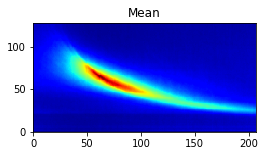

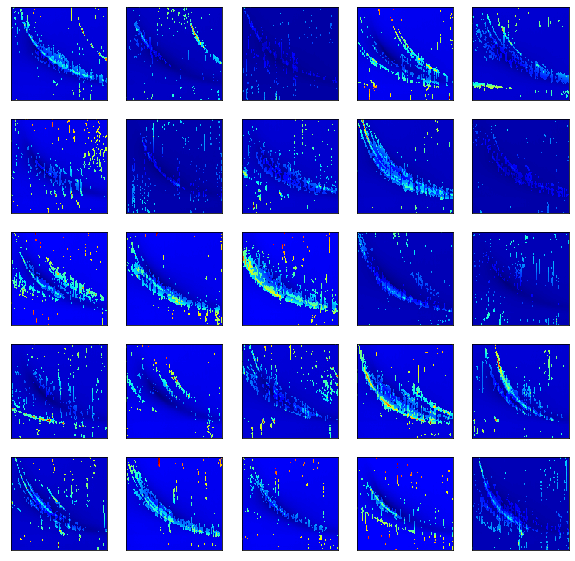

In [23]:
# h5_sample = H5Sample(database_loc, site, test=False)
# h5_sample.spectrogram_plot(title=True)
plt.figure(figsize=(4,2)); plt.pcolormesh(_X_mean, cmap='jet');plt.title('Mean');plt.show()
n = 5
plt.figure(figsize=(n*2,n*2))
for ix in range(n*n):
    plt.subplot(n,n,ix+1)
    plt.pcolormesh(_X[np.random.randint(len(_X))], cmap='jet')
    plt.xticks([])
    plt.yticks([])
plt.show()

## Clustering

### K-Means

In [5]:
pca = PCA(0.9)#n_components=10)
X = _X.reshape(len(_X), _X[0].shape[0]*_X[0].shape[1])
X = preprocessing.scale(X)
X = pca.fit_transform(X)

In [6]:
kmeans = KMeans(n_clusters=2,max_iter=1000)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

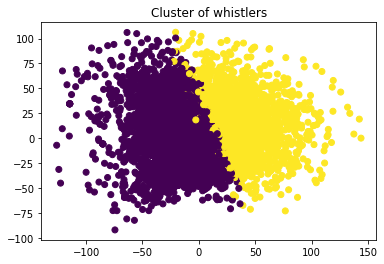

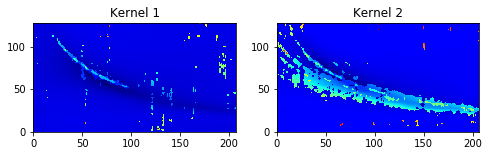

In [7]:
# fig = plt.figure(1, figsize=(8, 6))
# ax = Axes3D(fig)
# ax.scatter(X[:, 1], X[:, 2], -X[:, 0],
#            cmap=plt.cm.Set1, edgecolor='k', s=20, c=kmeans.labels_)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.title('Cluster of whistlers')
plt.show()

index = []
for centroid in kmeans.cluster_centers_:
    norm = np.linalg.norm(X-centroid, axis=1)
#     print(norm)
    index.append(np.argmin(norm))
# print(kmeans.cluster_centers_)
# print(index)
# print(X[index])
kernels = np.array(_X[index])
plt.figure(figsize=(2*len(index)*2,1*2))
for ix, kernel in enumerate(kernels):
    plt.subplot(1,len(kernels),ix+1)
    plt.pcolormesh(kernel, cmap='jet')
    plt.title('Kernel '+str(ix+1))

2013-07-20UT16:12:40.04451914.marion.vr2


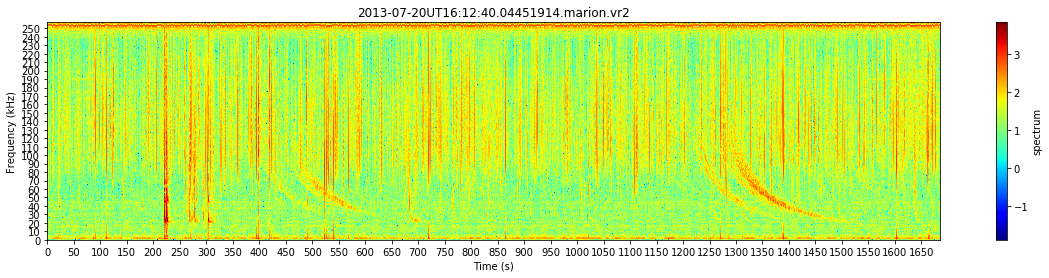

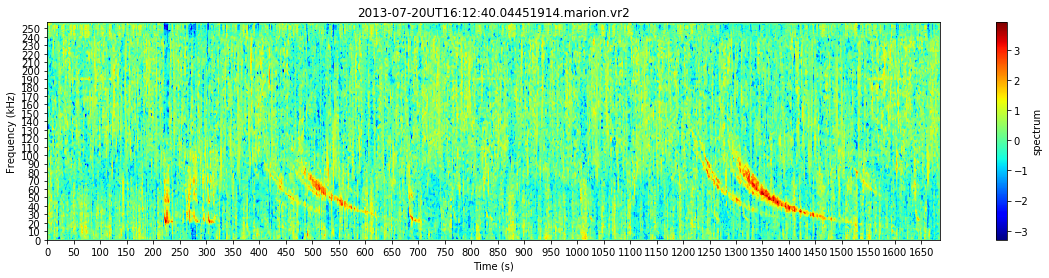

(257, 1685) (128, 207)
(257, 1685) 104158 1039.383184199442 1373


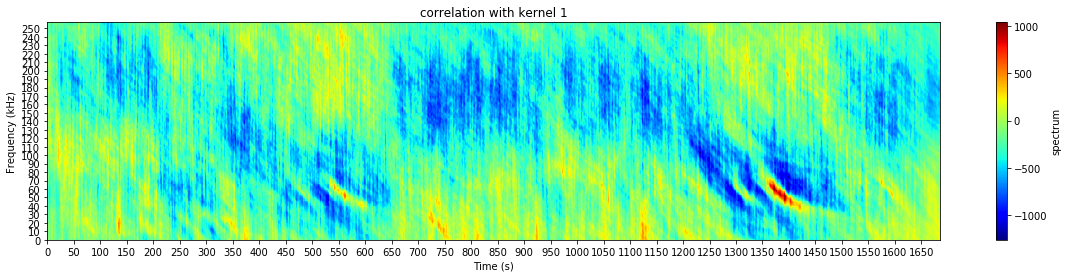

(257, 1685) (128, 207)
(257, 1685) 109243 5896.350539815915 1403


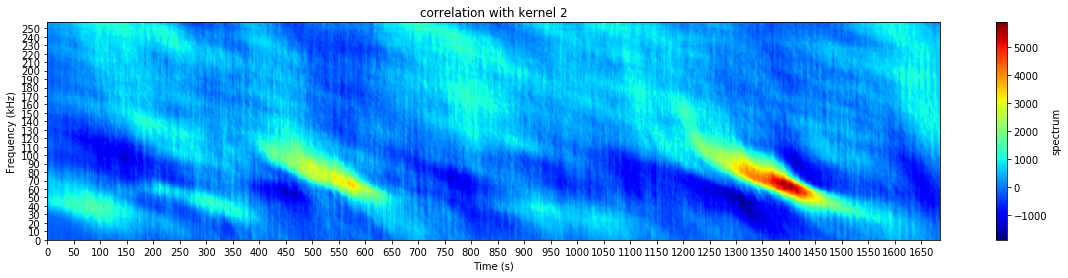

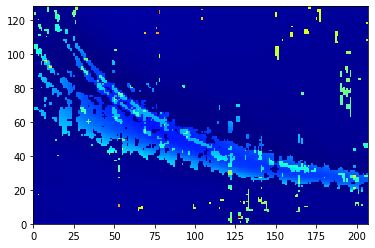

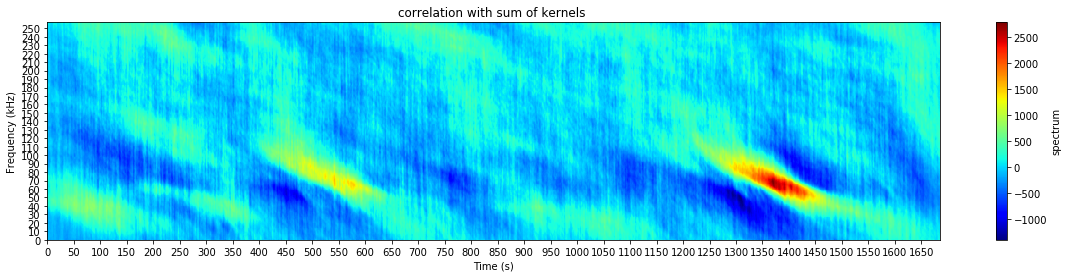

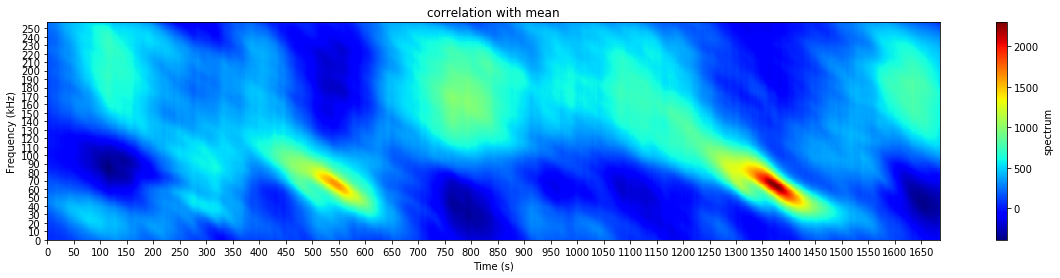

In [38]:
test_sample = my_database.train_test_load_random_sample(test=True)
my_sample = Sample(dataset_loc, site, test_sample)
# my_sample = Sample(dataset_loc, site, '2013-05-28UT14:14:00.28492164.marion.vr2')
# my_sample = Sample(dataset_loc, site, '2013-05-20UT20:15:09.24222156.marion.vr2')
# my_sample = Sample(dataset_loc, site, '2013-07-25UT15:06:06.85411922.marion.vr2')
# my_sample = Sample(dataset_loc, site, '2013-07-26UT02:35:55.34691914.marion.vr2')
# my_sample = Sample(dataset_loc, site, '2013-07-04UT19:09:19.11011930.marion.vr2')
# my_sample = Sample(dataset_loc, site, '2013-05-18UT14:02:12.39592156.marion.vr2')
# my_sample = Sample(dataset_loc, site, '2013-06-25UT15:57:59.60931922.marion.vr2')
# my_sample = Sample(dataset_loc, site, '2013-07-11UT05:39:45.20931938.marion.vr2')
my_sample = Sample(dataset_loc, site, '2013-07-20UT16:12:40.04451914.marion.vr2')
size=(20,4)
cmap='jet'
print(my_sample.get_file())
my_sample.spectrogram_plot(figsize=size, xaxis=None, yaxis=None, xlabel='Time (s)', ylabel='Frequency (kHz)', title=my_sample.get_file(), cmap=cmap)
my_sample.apply_zscore()
my_sample.apply_medfilt(kernel=(3,3))
# my_sample.apply_shift()
my_sample.spectrogram_plot(figsize=size, xaxis=None, yaxis=None, xlabel='Time (s)', ylabel='Frequency (kHz)', title=my_sample.get_file(), cmap=cmap)

# cut_kernels = [my_sample.get_spectrogram()[cut[0]:cut[1], cut[2]:cut[3]] for cut in my_sample.cuts(noise=False)[0]]
# for cut_kernel in cut_kernels:
#     corr = signal.correlate(my_sample.get_spectrogram(), cut_kernel, mode='same')
#     my_sample.spectrogram_plot(spec=corr,figsize=(14,4), xaxis=None, yaxis=None, xlabel='Time (s)', ylabel='Frequency (kHz)', title='correlation with kernel '+str(ix+1), cmap='jet')

# print(kernels.shape)
# w, h = kernels[0].shape
# kernels = preprocessing.scale(kernels.reshape(len(kernels),w*h))
# print(kernels.shape)
# kernels = kernels.reshape(len(kernels),w,h)
# print(kernels.shape)
corrs = []
for ix, kernel in enumerate(kernels):
    print(my_sample.get_spectrogram().shape, kernel.shape)
    corr = signal.correlate(my_sample.get_spectrogram(), kernel+_X_mean, mode='same')
    print(corr.shape,np.argmax(corr),corr.max(),np.argmax(corr)%corr.shape[1])
    my_sample.spectrogram_plot(spec=corr,figsize=size, xaxis=None, yaxis=None, xlabel='Time (s)', ylabel='Frequency (kHz)', title='correlation with kernel '+str(ix+1), cmap=cmap)
    corrs.append(corr)
_kernels = np.mean(kernels, axis=0)+_X_mean
corr = signal.correlate(my_sample.get_spectrogram(), _kernels, mode='same')
plt.figure()
plt.pcolormesh(_kernels, cmap='jet')
plt.show()
my_sample.spectrogram_plot(spec=corr,figsize=size, xaxis=None, yaxis=None, xlabel='Time (s)', ylabel='Frequency (kHz)', title='correlation with sum of kernels ', cmap=cmap)

corr = signal.correlate(my_sample.get_spectrogram(), _X_mean, mode='same')
my_sample.spectrogram_plot(spec=corr,figsize=size, xaxis=None, yaxis=None, xlabel='Time (s)', ylabel='Frequency (kHz)', title='correlation with mean' , cmap=cmap)

# whistlers to take 
# 2013-07-29UT13:46:27.33411914.marion.vr2
